<a href="https://colab.research.google.com/github/CLCHRISLOMBARDO/data_mining/blob/main/Lombardo(versi%C3%B3n_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab Base para el Trabajo Práctico (versión 1)
Programa de creación de entregas. Versión 1

In [1]:
import pandas as pd

import sklearn as sk
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## 0. Lectura de datos

In [3]:
# TODO: Cambiar para que apunte al directorio correcto
DIR = "/content/drive/MyDrive/Data Science/Ms Data mining UBA/1er_cuatrimestre/data_mining"

In [4]:
df_train = pd.read_csv(f"{DIR}/entrenamiento.zip", index_col="id")
df_train.head()

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,price
id,,,,,,,,,,,,,,,,,,,,,
556713,Propiedad,2019-11-29,9999-12-31,2019-11-29,-58.442399,-34.573623,Argentina,Capital Federal,Colegiales,NaN,...,2.0,NaN,NaN,USD,NaN,"Departamento en Venta en Belgrano, Capital fed...","Sup total por escritura: 96,47 m2 (cubiertos: ...",Departamento,Venta,259000.0
257134,Propiedad,2019-08-17,9999-12-31,2019-08-17,-58.420737,-34.631770,Argentina,Capital Federal,Boedo,NaN,...,1.0,74.0,47.0,USD,NaN,PH Venta Boedo 2 amb Patio,Corredor Responsable: MARCELO TRUJILLO - CPI ...,PH,Venta,140000.0
521738,Propiedad,2019-08-05,2019-08-31,2019-08-05,-58.429983,-34.607225,Argentina,Capital Federal,Almagro,NaN,...,1.0,66.0,64.0,USD,NaN,Venta 3 Ambientes - Almagro - Balcón - Ameniti...,Corredor Responsable: Marcelo Trujillo - CUCIC...,Departamento,Venta,173000.0
383947,Propiedad,2019-10-23,2019-11-08,2019-10-23,-58.420780,-34.608640,Argentina,Capital Federal,Almagro,NaN,...,1.0,55.0,55.0,USD,NaN,Depto.tipo casa de 3 ambientes en Venta en Alm...,"Muy Lindo ph al contrafrente con 2 patios!, 80...",PH,Venta,155000.0
986212,Propiedad,2019-08-01,2019-08-14,2019-08-01,-58.371394,-34.621835,Argentina,Capital Federal,San Telmo,NaN,...,1.0,42.0,42.0,USD,NaN,Ph en edificio de estilo Frances . 2 dormitori...,PH en Edificio Frances en Estado original!!!al...,PH,Venta,74000.0


In [5]:
df_test = pd.read_csv(f"{DIR}/a_predecir.zip", index_col="id")
df_test.head()

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,price
id,,,,,,,,,,,,,,,,,,,,,
1068,Propiedad,2020-06-21,2020-06-27,2020-06-21,NaN,NaN,Argentina,Capital Federal,Palermo,Palermo Viejo,...,1.0,286.0,160.0,USD,NaN,Casa de 4 ambientes en Venta en Palermo viejo,TRIPLEX EN MEDIO TERRENO DE 4 AMB MUY AMPLIOS...,Casa,Venta,NaN
1069,Propiedad,2020-06-21,2020-06-27,2020-06-21,-58.426576,-34.590987,Argentina,Capital Federal,Palermo,NaN,...,5.0,444.0,270.0,USD,NaN,Casa de 8 ambientes en Venta en Palermo,OPORTUNIDAD!! Edificio en Block desarrollado e...,Casa,Venta,NaN
1073,Propiedad,2020-06-21,2020-06-24,2020-06-21,-58.479808,-34.631266,Argentina,Capital Federal,Floresta,NaN,...,2.0,166.0,120.0,USD,NaN,Venta de casa en PH en Floresta,Casa con muy buena distribución y de amplios a...,Casa,Venta,NaN
1082,Propiedad,2020-06-21,2020-06-27,2020-06-21,-58.437889,-34.603291,Argentina,Capital Federal,Villa Crespo,NaN,...,3.0,352.0,185.0,USD,NaN,Casa de 5 ambientes en Venta en Villa crespo,SON 185 METROS CUBIERNTOS CON COCHERA MAS PATI...,Casa,Venta,NaN
1091,Propiedad,2020-06-21,2020-06-27,2020-06-21,-58.476461,-34.602494,Argentina,Capital Federal,Villa del Parque,NaN,...,2.0,168.0,106.0,USD,NaN,Venta de casa de tres ambientes en Villa del P...,"Hermosa casa ubicada en zona residencial, sobr...",Casa,Venta,NaN


-------------------
**0.0. TAMAÑO DE LAS MUESTRAS**

In [ ]:
print(f"el tamaño del entrenamiento es : {df_train.shape}")
print(f"el tamaño del test es : {df_test.shape}")

el tamaño del entrenamiento es : (985180, 24)
el tamaño del test es : (7012, 24)


-----------
**0.1. INFORMACION DE CADA ATRIBUTO**

*0.1.0. INFORMACION GENERAL DE LOS ATRIBUTOS*

---------


In [ ]:
columns = df_train.columns
for column in columns:
  tipo=df_train[column].dtype
  print(f"La columna : {column} es de tipo : {tipo}")

La columna : ad_type es de tipo : object
La columna : start_date es de tipo : object
La columna : end_date es de tipo : object
La columna : created_on es de tipo : object
La columna : lat es de tipo : float64
La columna : lon es de tipo : float64
La columna : l1 es de tipo : object
La columna : l2 es de tipo : object
La columna : l3 es de tipo : object
La columna : l4 es de tipo : object
La columna : l5 es de tipo : object
La columna : l6 es de tipo : float64
La columna : rooms es de tipo : float64
La columna : bedrooms es de tipo : float64
La columna : bathrooms es de tipo : float64
La columna : surface_total es de tipo : float64
La columna : surface_covered es de tipo : float64
La columna : currency es de tipo : object
La columna : price_period es de tipo : object
La columna : title es de tipo : object
La columna : description es de tipo : object
La columna : property_type es de tipo : object
La columna : operation_type es de tipo : object
La columna : price es de tipo : float64


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7012 entries, 1068 to 960229
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ad_type          7012 non-null   object 
 1   start_date       7012 non-null   object 
 2   end_date         7012 non-null   object 
 3   created_on       7012 non-null   object 
 4   lat              6541 non-null   float64
 5   lon              6541 non-null   float64
 6   l1               7012 non-null   object 
 7   l2               7012 non-null   object 
 8   l3               7004 non-null   object 
 9   l4               389 non-null    object 
 10  l5               0 non-null      float64
 11  l6               0 non-null      float64
 12  rooms            6518 non-null   float64
 13  bedrooms         4678 non-null   float64
 14  bathrooms        6803 non-null   float64
 15  surface_total    6980 non-null   float64
 16  surface_covered  6938 non-null   float64
 17  currency      

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 985180 entries, 556713 to 1000000
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ad_type          985180 non-null  object 
 1   start_date       985180 non-null  object 
 2   end_date         985180 non-null  object 
 3   created_on       985180 non-null  object 
 4   lat              832453 non-null  float64
 5   lon              833388 non-null  float64
 6   l1               985180 non-null  object 
 7   l2               985180 non-null  object 
 8   l3               927733 non-null  object 
 9   l4               225006 non-null  object 
 10  l5               4711 non-null    object 
 11  l6               0 non-null       float64
 12  rooms            496527 non-null  float64
 13  bedrooms         386021 non-null  float64
 14  bathrooms        766218 non-null  float64
 15  surface_total    441184 non-null  float64
 16  surface_covered  430023 non-null  flo

In [ ]:
df_train.describe()

,lat,lon,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,832453.000000,833388.000000,0.0,496527.000000,386021.000000,766218.000000,441184.000000,4.300230e+05,9.407990e+05
mean,-59.273078,-34.795283,NaN,2.865331,2.088822,1.700136,500.110607,5.851866e+02,2.888822e+05
std,2.716961,3.078145,NaN,1.687075,2.719330,1.074748,4133.349588,7.443324e+04,5.581522e+06
min,-180.000000,-54.842464,NaN,1.000000,-13.000000,1.000000,-200.000000,-1.700000e+02,0.000000e+00
25%,-58.762921,-34.923353,NaN,2.000000,1.000000,1.000000,50.000000,4.500000e+01,3.900000e+04
50%,-58.444935,-34.611182,NaN,3.000000,2.000000,1.000000,96.000000,7.500000e+01,9.725400e+04
75%,-58.047423,-34.454720,NaN,4.000000,3.000000,2.000000,275.000000,1.580000e+02,2.100000e+05
max,-35.045025,85.051129,NaN,40.000000,900.000000,20.000000,200000.000000,2.700000e+07,3.100000e+09


In [ ]:
df_test.describe()

,lat,lon,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price_period,price
count,6541.000000,6541.000000,0.0,0.0,6518.000000,4678.000000,6803.000000,6980.000000,6938.000000,0.0,0.0
mean,-58.440334,-34.597839,NaN,NaN,2.344124,1.861052,1.416140,76.393553,66.649178,NaN,NaN
std,0.171672,0.238984,NaN,NaN,1.173275,1.003062,0.762132,75.227804,61.792004,NaN,NaN
min,-68.468140,-53.788249,NaN,NaN,1.000000,1.000000,1.000000,10.000000,1.000000,NaN,NaN
25%,-58.454079,-34.606504,NaN,NaN,1.000000,1.000000,1.000000,40.000000,37.000000,NaN,NaN
50%,-58.436266,-34.597477,NaN,NaN,2.000000,2.000000,1.000000,56.000000,50.000000,NaN,NaN
75%,-58.418310,-34.582409,NaN,NaN,3.000000,2.000000,2.000000,84.000000,75.000000,NaN,NaN
max,-58.358678,-33.081030,NaN,NaN,16.000000,12.000000,8.000000,1515.000000,2422.000000,NaN,NaN


*0.1.1. Atributo "start_date" y "end_date"*

----

In [ ]:
# Creamos una funcion para extraer los primeros cuatro numeros, es decir, el año. Esto es porque estamos sospechando que lo que esta mal en las fechas es el año
years_df_train_start = df_train["start_date"].apply(lambda row : row[:4])
print(years_df_train_start.head(2))
print('')
print(f"Los años contenidos en start_date en df_train son : {years_df_train_start.unique()} --> Entonces estan bien")

years_df_test_start= df_test["start_date"].apply(lambda row : row[:4] )
print(f"Los años contenidos en start_date en df_test son : {years_df_test_start.unique()} --> Entonces estan bien")
print('')

years_df_train_end = df_train["end_date"].apply(lambda row : row[:4])
print(f"Los años contenidos en end_date en df_train son : {years_df_train_end.unique()} --> Entonces hay que corregirlos")

years_df_test_end = df_test["end_date"].apply(lambda row : row[:4])
print(f"Los años contenidos en end_date en df_test son : {years_df_test_end.unique()} --> Entonces hay que corregirlos")





id
556713    2019
257134    2019
Name: start_date, dtype: object

Los años contenidos en start_date en df_train son : ['2019' '2020'] --> Entonces estan bien
Los años contenidos en start_date en df_test son : ['2020'] --> Entonces estan bien

Los años contenidos en end_date en df_train son : ['9999' '2019' '2020'] --> Entonces hay que corregirlos
Los años contenidos en end_date en df_test son : ['2020' '9999'] --> Entonces hay que corregirlos


In [ ]:
# Vamos a analizar entonces cuantos valores '9999' hay en los datos.
fechas_mal_df_train = years_df_train_end[years_df_train_end == "9999"].count()
fechas_mal_df_test = years_df_test_end[years_df_test_end == "9999"].count()

porcentaje_fechas_mal_df_train = fechas_mal_df_train / df_train["end_date"].shape[0] *100
porcentaje_fechas_mal_df_test = fechas_mal_df_test / df_test["end_date"].shape[0] * 100



print(f'La cantidad de fechas mal notadas en "end_date" de df_train son : {fechas_mal_df_train} de {df_train["end_date"].shape[0]} -> {porcentaje_fechas_mal_df_train:0.2f} %')
print(f'La cantidad de fechas mal notadas en "end_date" de df_test son {fechas_mal_df_test} de {len(df_test["end_date"])}  -> {porcentaje_fechas_mal_df_test:0.2f} %')

La cantidad de fechas mal notadas en "end_date" de df_train son : 190182 de 985180 -> 19.30 %
La cantidad de fechas mal notadas en "end_date" de df_test son 965 de 7012  -> 13.76 %


Ahora sabemos que hay que modificar esas fechas. Entonces la cuestion es saber si el end_date es igual que el start_date o no.

Para eso vamos a ver cuantas star_date == end_date, y dependiendo el numero vamos a decidir

In [ ]:
# aca estoy viendo cuanto de los que los años de start y end sean iguales
print(f'De los {len(df_train["end_date"])} datos no nulos, hay {(years_df_train_start == years_df_train_end).sum()} en donde end_date = start_date')

De los 985180 datos no nulos, hay 694556 en donde end_date = start_date


Entonces, vamos a ver si los que faltan es por el error del 9999

In [ ]:
print(f"Hay {years_df_train_end[(years_df_train_end == '2019')|(years_df_train_end == '2020')].count()} datos correctos")
print(f"""Entonces hay {years_df_train_end[(years_df_train_end == '2019')|(years_df_train_end == '2020')].count() - (years_df_train_start == years_df_train_end).sum()} datos correctos donde start_date != end_date""")

Hay 794998 datos correctos
Entonces hay 100442 datos correctos donde start_date != end_date


Una idea es que esos 1004402 datos en donde **start_date != end_date** se deba a que el *start_date* es en los ultimos meses del año y el *end_date* en el principio del siguiente

In [ ]:
years_start_end_train= pd.concat([years_df_train_start,years_df_train_end],axis=1)
years_start_end_train.head()

,start_date,end_date
id,,
556713,2019,9999
257134,2019,9999
521738,2019,2019
383947,2019,2019
986212,2019,2019


In [ ]:
years_start_end_train[(years_start_end_train["start_date"] == "2019")& (years_start_end_train["end_date"] == "2020")]

,start_date,end_date
id,,
438415,2019,2020
556695,2019,2020
410552,2019,2020
166069,2019,2020
339691,2019,2020
...,...,...
988409,2019,2020
988416,2019,2020
988485,2019,2020


In [ ]:
list_index=list(years_start_end_train[(years_start_end_train["start_date"] == "2019")& (years_start_end_train["end_date"] == "2020")].index)
df_train.loc[list_index , "start_date" : "end_date"]

,start_date,end_date
id,,
438415,2019-11-16,2020-02-09
556695,2019-11-29,2020-01-21
410552,2019-10-13,2020-01-21
166069,2019-07-26,2020-02-04
339691,2019-11-20,2020-06-19
...,...,...
988409,2019-08-01,2020-01-09
988416,2019-08-01,2020-08-14
988485,2019-08-01,2020-07-23


Podriamos ver las diferencias absolutas entre los meses. Luego hacer un histograma y ver la frecuencia entre la diferencia de 0,1,...,11. Lo vamos a dejar para después.

Por el momento vamos a hacer que los start_date = end_dates

*0.1.2. Atributo "created_date"*

----

In [ ]:
year_created_df_train = df_train["created_on"].apply(lambda row : row[:4])
print(f"Los años de created en df_train : {year_created_df_train.unique()}")

year_created_df_test = df_test["created_on"].apply(lambda row : row[:4])
print(f"Los años de created en df_test : {year_created_df_test.unique()}")

Los años de created en df_train : ['2019' '2020']
Los años de created en df_test : ['2020']


Entonces esta todo bien.

In [ ]:
df_train[["created_on" , "start_date" , "end_date"]]

,created_on,start_date,end_date
id,,,
556713,2019-11-29,2019-11-29,9999-12-31
257134,2019-08-17,2019-08-17,9999-12-31
521738,2019-08-05,2019-08-05,2019-08-31
383947,2019-10-23,2019-10-23,2019-11-08
986212,2019-08-01,2019-08-01,2019-08-14
...,...,...,...
999996,2020-01-09,2020-01-09,2020-04-27
999997,2020-01-09,2020-01-09,2020-04-27
999998,2020-01-09,2020-01-09,2020-04-27


Por lo que veo, created_date == start_date. Vamos a comprobarlo

In [ ]:
boolean_dates_train = df_train["created_on"] == df_train["start_date"]
print(boolean_dates_train.unique())

boolean_dates_test = df_test["created_on"] == df_test["start_date"]
print(boolean_dates_test.unique())

[ True]
[ True]


*0.1.3. Atributo "l1", "l2", "l3", "l4", "l5", "l6"*

----

Vamos a comenzar a entender que son esos atributos, porque el nombre no nos dice mucho.

Para eso vamos a ver los valores que tienen cadaatributo

In [ ]:
for i in range(1,5):
  print("--------------------------------------------------------------")
  print(f"estamos en l{i}")
  print(df_test[f'l{i}'].unique())

--------------------------------------------------------------
estamos en l1
['Argentina']
--------------------------------------------------------------
estamos en l2
['Capital Federal']
--------------------------------------------------------------
estamos en l3
['Palermo' 'Floresta' 'Villa Crespo' 'Villa del Parque' 'Liniers'
 'Paternal' 'Almagro' 'Saavedra' 'Parque Chacabuco' 'Recoleta'
 'Monte Castro' 'Mataderos' 'Villa Pueyrredón' 'Boedo' 'Barrio Norte'
 'Caballito' 'Agronomía' 'Flores' 'Parque Avellaneda' 'Pompeya'
 'Parque Chas' 'Villa General Mitre' 'Congreso' 'San Cristobal'
 'Villa Urquiza' 'Coghlan' 'Belgrano' 'Villa Real' 'Villa Lugano'
 'Villa Devoto' 'Balvanera' nan 'Barracas' 'Villa Santa Rita' 'San Telmo'
 'San Nicolás' 'Nuñez' 'Chacarita' 'Versalles' 'Villa Luro'
 'Parque Centenario' 'Parque Patricios' 'Constitución' 'Once'
 'Velez Sarsfield' 'Monserrat' 'Colegiales' 'Tribunales' 'Villa Ortuzar'
 'Centro / Microcentro' 'Puerto Madero' 'Las Cañitas' 'Abasto' 'Retiro'
 

In [ ]:
for i in range(1,5):
  print("--------------------------------------------------------------")
  print(f"estamos en l{i}")
  print(df_train[f'l{i}'].unique())

--------------------------------------------------------------
estamos en l1
['Argentina' 'Uruguay' 'Estados Unidos' 'Brasil']
--------------------------------------------------------------
estamos en l2
['Capital Federal' 'Bs.As. G.B.A. Zona Sur' 'Buenos Aires Interior'
 'Córdoba' 'Bs.As. G.B.A. Zona Norte' 'Santa Fe' 'Tucumán'
 'Buenos Aires Costa Atlántica' 'Maldonado' 'San Luis' 'Neuquén'
 'Bs.As. G.B.A. Zona Oeste' 'Entre Ríos' 'Montevideo' 'Mendoza' 'Misiones'
 'Río Negro' 'Tierra Del Fuego' 'Pennsylvania' 'Chubut' 'Corrientes'
 'Salta' 'La Rioja' 'La Pampa' 'Chaco' 'San Juan' 'Rocha' 'Jujuy'
 'Maryland' 'Canelones' 'Santa Catarina' 'Colonia' 'Florida' 'Santa Cruz'
 'Michigan' 'Miami' 'Santiago Del Estero' 'Rio de Janeiro' 'Formosa'
 'Catamarca' 'Rio Grande do Norte' 'São Paulo']
--------------------------------------------------------------
estamos en l3
['Colegiales' 'Boedo' 'Almagro' ... 'Santa Clara de Buena Vista'
 'Bella Italia' 'Saladero Mariano Cabal']
-------------------

Vemos que df_test tiene solo Argentina, en cambio, df_train, tiene varios paises mas.

Para esto creo que seria conveniente eliminar los demas paises.

df_test tiene solo capital federal en las ciudades. Vamos a ver entonces que ciudades argentinas tiene df_train

In [ ]:
for i in range(1,5):
  print("--------------------------------------------------------------")
  print(f"estamos en l{i}")
  print(df_train[df_train['l1'] == 'Argentina'][f'l{i}'].unique())

--------------------------------------------------------------
estamos en l1
['Argentina']
--------------------------------------------------------------
estamos en l2
['Capital Federal' 'Bs.As. G.B.A. Zona Sur' 'Buenos Aires Interior'
 'Córdoba' 'Bs.As. G.B.A. Zona Norte' 'Santa Fe' 'Tucumán'
 'Buenos Aires Costa Atlántica' 'San Luis' 'Neuquén'
 'Bs.As. G.B.A. Zona Oeste' 'Entre Ríos' 'Mendoza' 'Misiones' 'Río Negro'
 'Tierra Del Fuego' 'Chubut' 'Corrientes' 'Salta' 'La Rioja' 'La Pampa'
 'Chaco' 'San Juan' 'Jujuy' 'Santa Cruz' 'Santiago Del Estero' 'Formosa'
 'Catamarca']
--------------------------------------------------------------
estamos en l3
['Colegiales' 'Boedo' 'Almagro' ... 'Santa Clara de Buena Vista'
 'Bella Italia' 'Saladero Mariano Cabal']
--------------------------------------------------------------
estamos en l4
[nan 'Palermo Viejo' 'Villa Elisa' 'La Plata' 'Palermo Hollywood'
 'Palermo Soho' 'Haras del Sur I' 'Manuel B Gonnet' 'Palermo Chico'
 'City Bell' 'Tolosa' 'V

Podemos observar que df_train tiene mas que Capital Federal.

Entonces tendremos que decidir si vamos a trabajar con todas las ciudades, o abarcar mas que nada Capital Federal.

Vamos a ver ahora cuantos datos tendriamos si eliminamos a los demas paises en "l1"

In [ ]:
n_casas_arg=df_train[df_train["l1"]=="Argentina"]["l1"].count()
proporcion_casas_arg = n_casas_arg / len(df_train["l1"])
print(f"Tendriamos {n_casas_arg} casas en Argentina, es decir, {proporcion_casas_arg * 100:0.2f} % del total")


n_casas_arg=df_train[df_train["l1"]!="Argentina"]["l1"].count()
proporcion_casas_arg = n_casas_arg / len(df_train["l1"])
print(f"Tendriamos {n_casas_arg} casas fuera de Argentina, es decir, {proporcion_casas_arg * 100:0.2f} % del total")

Tendriamos 966410 casas en Argentina, es decir, 98.09 % del total
Tendriamos 18770 casas fuera de Argentina, es decir, 1.91 % del total


Vamos a ver cuantos datos tendriamos si solo consideramos en "l2" a capital federal como esta en df_test

In [ ]:
n_casas_cf=df_train[df_train["l2"]=='Capital Federal']['l2'].count()
proporcion_casas_cf = n_casas_cf / len(df_train["l1"])

print(f"Tendriamos {n_casas_cf} casas en Argentina, es decir, {proporcion_casas_cf * 100:0.2f} % del total")


Tendriamos 242726 casas en Argentina, es decir, 24.64 % del total


Los datos se reducirian bastante. Por el momento vamos solo a considerar todas las ciudades de Argentina

Con respecto a lso atributos "l5" y "l6", podemos observar que son todos nulos, salvo en df_train para "l5" que son muy pocos los no nulos.

Por lo que vamos a desprecias estos atributos

In [ ]:
df_train[~df_train['l5'].isna()]['l5'].unique()

array(['Islas del Canal', 'Barrio El Golf', 'Barrio Los Lagos',
       'Barrio Los Sauces', 'Barrio El Yacht', 'BarrioPortezuelo',
       'Barrio Los Tilos', 'Barrio Lagos del Golf 2',
       'Barrio Cabos del Lago', 'Barrio Las Glorietas',
       'Barrio Los Alisos', 'Barrio Las Caletas',
       'Barrio Barrancas del Lago', 'Barrio Los Castores',
       'Barrio Residencial Pacheco 2', 'Enyoi', 'Barrio Lagos del Golf 1',
       'Barrio La Isla', 'Barrio La Alameda', 'QBay Yacht',
       'Barrio Residencial Pacheco 1'], dtype=object)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 985180 entries, 556713 to 1000000
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ad_type          985180 non-null  object 
 1   start_date       985180 non-null  object 
 2   end_date         985180 non-null  object 
 3   created_on       985180 non-null  object 
 4   lat              832453 non-null  float64
 5   lon              833388 non-null  float64
 6   l1               985180 non-null  object 
 7   l2               985180 non-null  object 
 8   l3               927733 non-null  object 
 9   l4               225006 non-null  object 
 10  l5               4711 non-null    object 
 11  l6               0 non-null       float64
 12  rooms            496527 non-null  float64
 13  bedrooms         386021 non-null  float64
 14  bathrooms        766218 non-null  float64
 15  surface_total    441184 non-null  float64
 16  surface_covered  430023 non-null  flo

In [ ]:
df_train.describe()

,lat,lon,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,832453.000000,833388.000000,0.0,496527.000000,386021.000000,766218.000000,441184.000000,4.300230e+05,9.407990e+05
mean,-59.273078,-34.795283,NaN,2.865331,2.088822,1.700136,500.110607,5.851866e+02,2.888822e+05
std,2.716961,3.078145,NaN,1.687075,2.719330,1.074748,4133.349588,7.443324e+04,5.581522e+06
min,-180.000000,-54.842464,NaN,1.000000,-13.000000,1.000000,-200.000000,-1.700000e+02,0.000000e+00
25%,-58.762921,-34.923353,NaN,2.000000,1.000000,1.000000,50.000000,4.500000e+01,3.900000e+04
50%,-58.444935,-34.611182,NaN,3.000000,2.000000,1.000000,96.000000,7.500000e+01,9.725400e+04
75%,-58.047423,-34.454720,NaN,4.000000,3.000000,2.000000,275.000000,1.580000e+02,2.100000e+05
max,-35.045025,85.051129,NaN,40.000000,900.000000,20.000000,200000.000000,2.700000e+07,3.100000e+09


In [ ]:
df_test.describe()

,lat,lon,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price_period,price
count,6541.000000,6541.000000,0.0,0.0,6518.000000,4678.000000,6803.000000,6980.000000,6938.000000,0.0,0.0
mean,-58.440334,-34.597839,NaN,NaN,2.344124,1.861052,1.416140,76.393553,66.649178,NaN,NaN
std,0.171672,0.238984,NaN,NaN,1.173275,1.003062,0.762132,75.227804,61.792004,NaN,NaN
min,-68.468140,-53.788249,NaN,NaN,1.000000,1.000000,1.000000,10.000000,1.000000,NaN,NaN
25%,-58.454079,-34.606504,NaN,NaN,1.000000,1.000000,1.000000,40.000000,37.000000,NaN,NaN
50%,-58.436266,-34.597477,NaN,NaN,2.000000,2.000000,1.000000,56.000000,50.000000,NaN,NaN
75%,-58.418310,-34.582409,NaN,NaN,3.000000,2.000000,2.000000,84.000000,75.000000,NaN,NaN
max,-58.358678,-33.081030,NaN,NaN,16.000000,12.000000,8.000000,1515.000000,2422.000000,NaN,NaN


*0.1.4. Atributo "lat" y "lon"*

----

En la informacion podemos observar que hay valores negativos. Vamos a analizar si se trata de de todos los valores. Aunque la verdad no sé qué se tratan estos atributos. De ultima, lo vamos a dejar asi por el momento hasta saber de qué trata este valor

In [ ]:
# Todos los valores de lat son negativos ?
print(f'Son todos los valores de "lat" negativos : {df_train[df_train["lat"]<0]["lat"].count()  == df_train["lat"].count()}')
print(f'Son todos los valores de "lon" negativos : {df_train[df_train["lon"]<0]["lon"].count()  == df_train["lon"].count()}')

Son todos los valores de "lat" negativos : True
Son todos los valores de "lon" negativos : False


<Axes: xlabel='lon', ylabel='lat'>

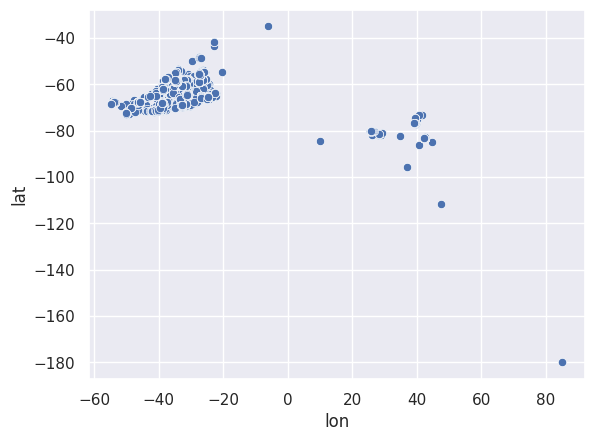

In [ ]:
sns.set(style="darkgrid")
sns.scatterplot(x="lon" , y="lat", data=df_train)


In [ ]:
print(f"En el grupo de lon=[-20;-60] y lat=[-40;-80] hay : {df_train[df_train['lon']<0]['lon'].count()} puntos")

print(f"En el grupo de lon=[0;+50] y lat=[-70;-120] hay : {df_train[(df_train['lon']>0)& (df_train['lon']<60)]['lon'].count()} puntos")

print(f"En el grupo de lon>80 y lat=-180 hay : {df_train[df_train['lon']>80]['lat'].count()} puntos")

En el grupo de lon=[-20;-60] y lat=[-40;-80] hay : 832596 puntos
En el grupo de lon=[0;+50] y lat=[-70;-120] hay : 787 puntos
En el grupo de lon>80 y lat=-180 hay : 3 puntos


<Axes: xlabel='lon', ylabel='lat'>

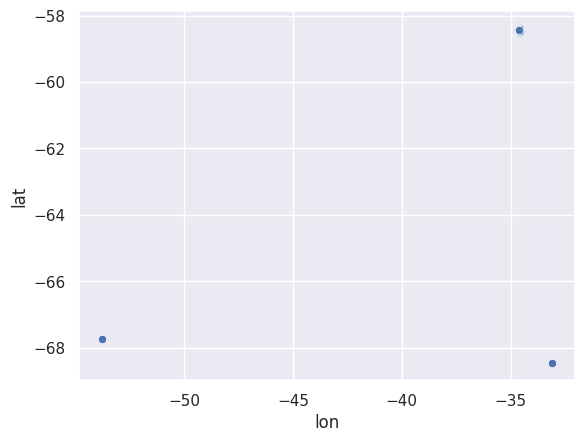

In [ ]:
sns.scatterplot(x="lon" , y="lat", data=df_test)

Vemos en el grafico que hay tres grupos de puntos. Vamos a ver cuantos hay en c/u

In [ ]:
print(f"En el grupo de (-60,-67) hay : {df_test[df_test['lon']<-50]['lon'].count()} puntos")

print(f"En el grupo de (-32,-69) hay : {df_test[df_test['lat']<-68]['lat'].count()} puntos")

print(f"En el grupo de (-58,-35) hay : {df_test[df_test['lat']>-60]['lat'].count()} puntos")



En el grupo de (-60,-67) hay : 1 puntos
En el grupo de (-32,-69) hay : 1 puntos
En el grupo de (-58,-35) hay : 6539 puntos


<Axes: >

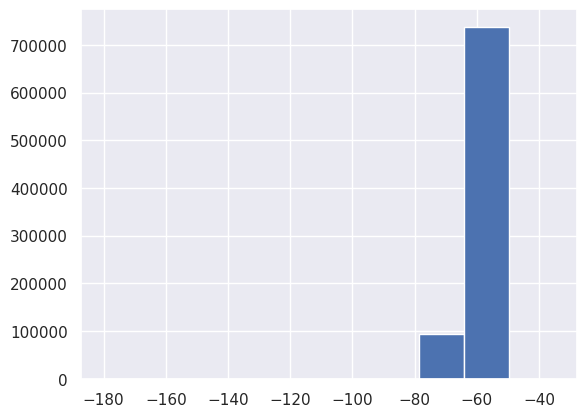

In [ ]:
df_train["lat"].hist()

<Axes: >

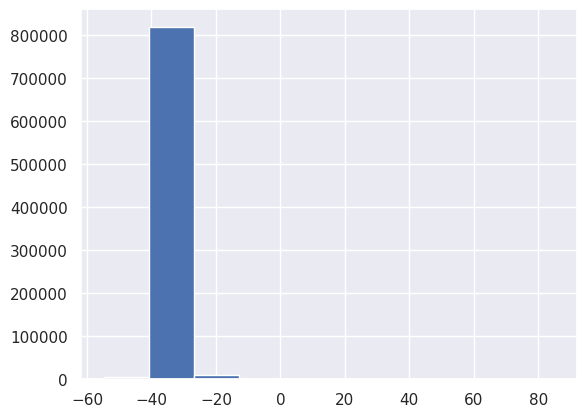

In [ ]:
df_train["lon"].hist()

<Axes: >

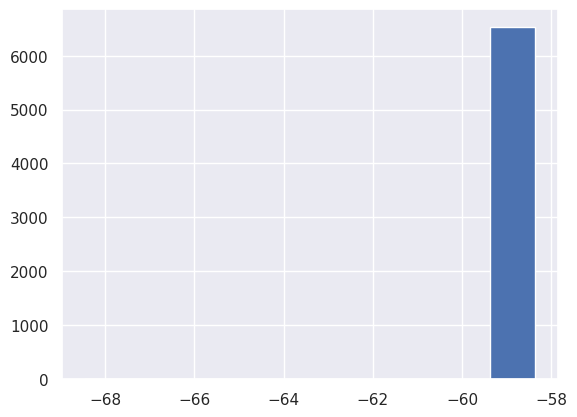

In [ ]:
df_test["lat"].hist()

<Axes: >

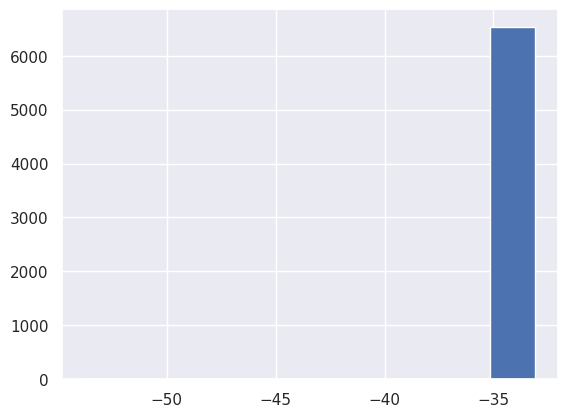

In [ ]:
df_test["lon"].hist()

Vamos a analizar si los df_train, el grupo de datos que esta mayor a 0 son de otro pais o algo asi

In [ ]:
df_train[(df_train['lon']>0)& (df_train['lon']<60)][["l1"]]["l1"].unique()

array(['Estados Unidos', 'Argentina'], dtype=object)

In [ ]:
df_train[df_train['lon']<0][["l1"]]["l1"].unique()

array(['Argentina', 'Uruguay', 'Brasil'], dtype=object)

In [ ]:
df_train[(df_train['l1']=='Argentina')& (df_train['lon']>0)& (df_train['lon']<60)][["l2"]]["l2"].unique()

array(['Bs.As. G.B.A. Zona Norte', 'Capital Federal',
       'Buenos Aires Costa Atlántica'], dtype=object)

In [ ]:
df_train[(df_train['lon']<0)&(df_train['l1']=='Argentina')][["l2"]]["l2"].unique()

array(['Capital Federal', 'Bs.As. G.B.A. Zona Sur', 'Córdoba',
       'Bs.As. G.B.A. Zona Norte', 'Santa Fe', 'Tucumán',
       'Buenos Aires Costa Atlántica', 'San Luis', 'Neuquén',
       'Buenos Aires Interior', 'Bs.As. G.B.A. Zona Oeste', 'Entre Ríos',
       'Mendoza', 'Misiones', 'Río Negro', 'Tierra Del Fuego', 'Chubut',
       'Corrientes', 'Salta', 'La Rioja', 'La Pampa', 'Chaco', 'San Juan',
       'Jujuy', 'Santa Cruz', 'Santiago Del Estero', 'Formosa',
       'Catamarca'], dtype=object)

*0.1.5. Atributo "rooms"*

----

Primero analizamos la cantidad de datos no nulos

In [ ]:
print(f"cantidad de datos no nulos para df_train : {df_train['rooms'].count()} --> {df_train['rooms'].count()/df_train['rooms'].shape[0]:.2f} %")
print(f"cantidad de datos no nulos para df_test : {df_test['rooms'].count()}--> {df_test['rooms'].count()/df_test['rooms'].shape[0]:.2f} %")

cantidad de datos no nulos para df_train : 496527 --> 0.50 %
cantidad de datos no nulos para df_test : 6518--> 0.93 %


<Axes: >

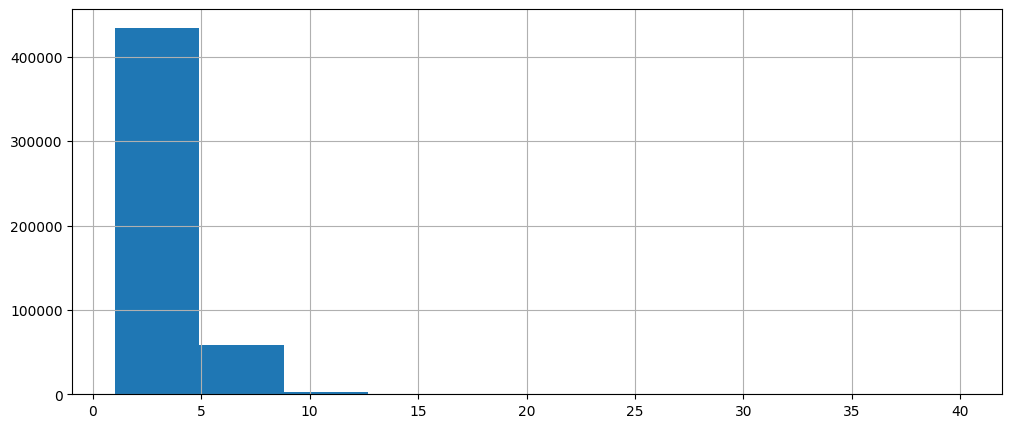

In [ ]:
df_train['rooms'].hist(figsize=(12,5))

In [ ]:
df_rooms_sorted = df_train.sort_values("rooms" , ascending =True)

<Axes: ylabel='rooms'>

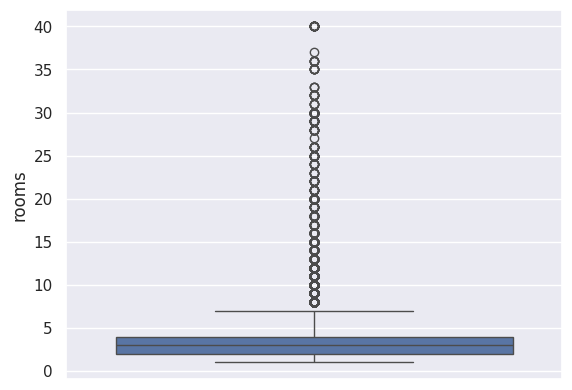

In [ ]:
sns.boxplot(data=df_rooms_sorted["rooms"])

Podemos observar que tenemos muchos valores atipicos para df_train

<Axes: >

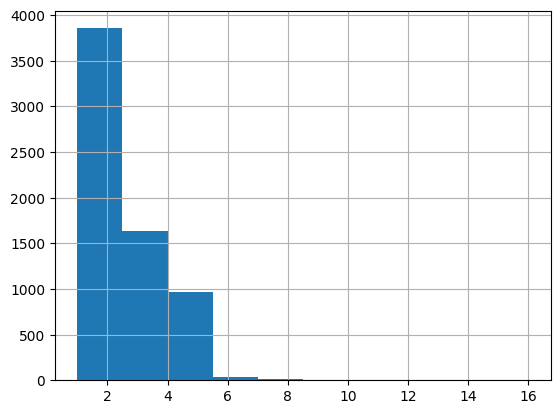

In [ ]:
df_test['rooms'].hist()

<Axes: ylabel='rooms'>

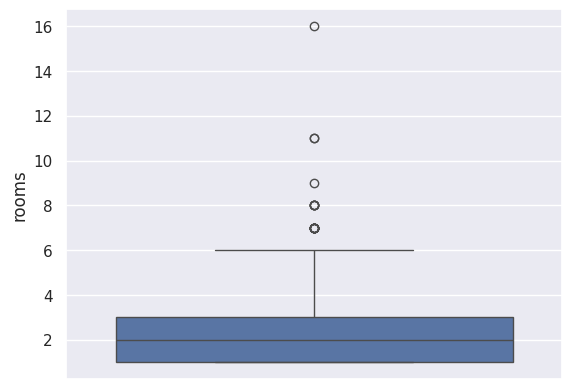

In [ ]:
sns.set(style='darkgrid')
sns.boxplot(data=df_test['rooms'])

*0.1.6. Atributo "bathrooms"*

----

In [10]:
print(f"cantidad de datos no nulos para df_train : {df_train['bathrooms'].count()} --> {df_train['bathrooms'].count()/df_train['bathrooms'].shape[0]*100:.2f} %")
print(f"cantidad de datos no nulos para df_test : {df_test['bathrooms'].count()}--> {df_test['bathrooms'].count()/df_test['bathrooms'].shape[0]*100:.2f} %")

cantidad de datos no nulos para df_train : 766218 --> 77.77 %
cantidad de datos no nulos para df_test : 6803--> 97.02 %


<Axes: >

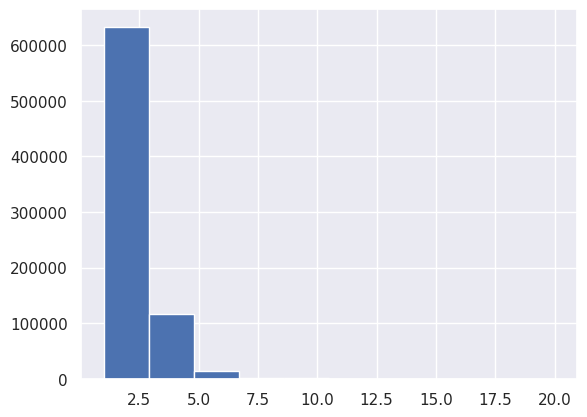

In [12]:
sns.set(style="darkgrid")
df_train["bathrooms"].hist()

<Axes: ylabel='bathrooms'>

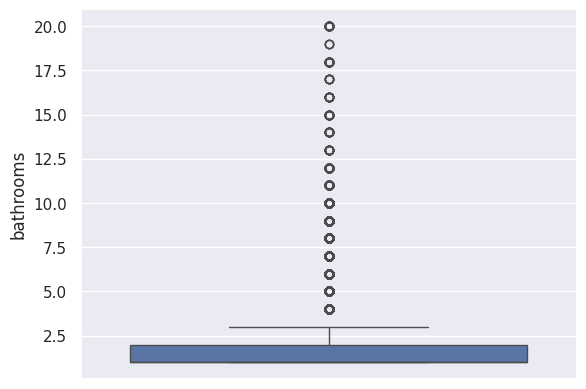

In [13]:
sns.boxplot(data=df_train["bathrooms"])

<Axes: >

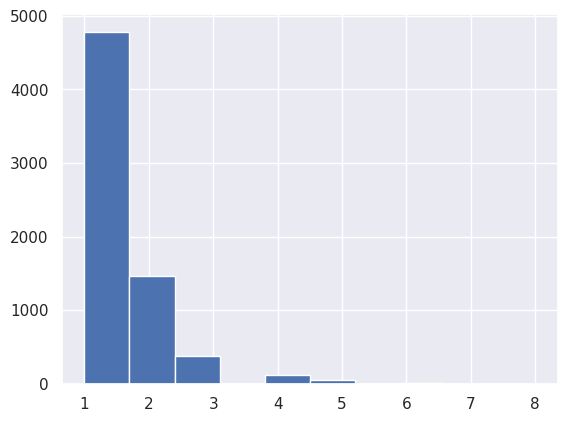

In [14]:
df_test["bathrooms"].hist()

<Axes: ylabel='bathrooms'>

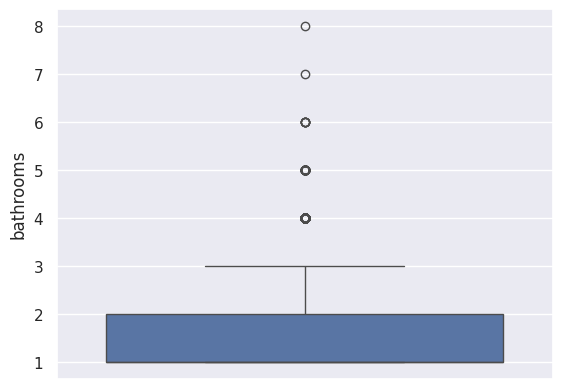

In [16]:
sns.boxplot(data=df_test["bathrooms"])

*0.1.6. Atributo "bedrooms"*

---------

In [18]:
print(f"cantidad de datos no nulos para df_train : {df_train['bedrooms'].count()} --> {df_train['bedrooms'].count()/df_train['bedrooms'].shape[0]*100:.2f} %")
print(f"cantidad de datos no nulos para df_test : {df_test['bedrooms'].count()}--> {df_test['bedrooms'].count()/df_test['bedrooms'].shape[0]*100:.2f} %")

cantidad de datos no nulos para df_train : 386021 --> 39.18 %
cantidad de datos no nulos para df_test : 4678--> 66.71 %


<Axes: >

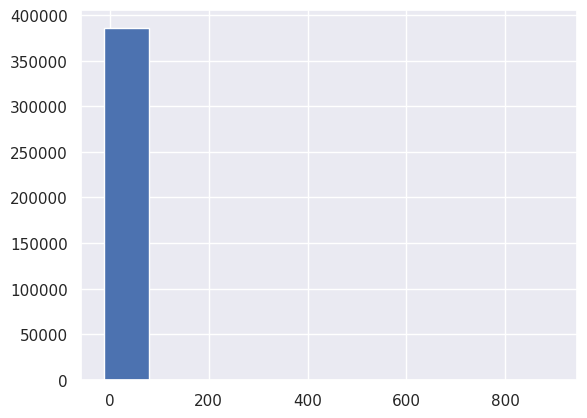

In [19]:
df_train["bedrooms"].hist()

<Axes: ylabel='bedrooms'>

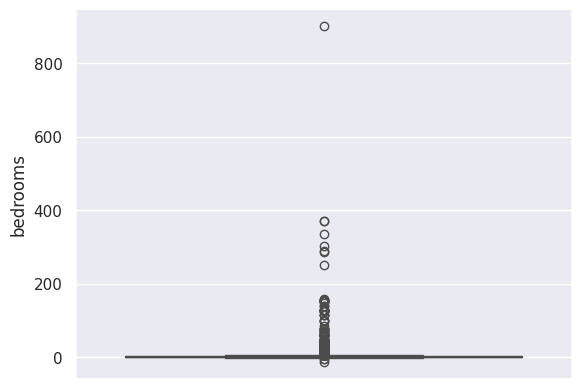

In [21]:
sns.boxplot(data=df_train["bedrooms"])

<Axes: >

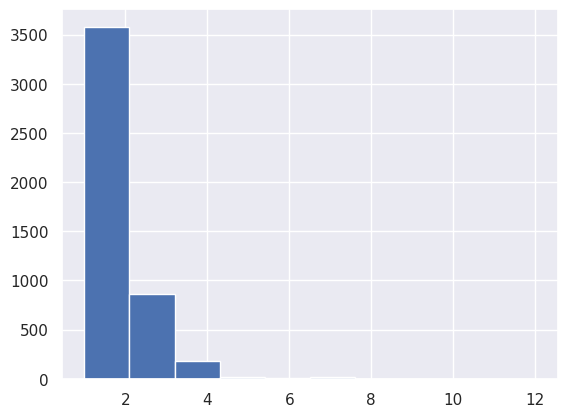

In [23]:
df_test["bedrooms"].hist()

<Axes: ylabel='bedrooms'>

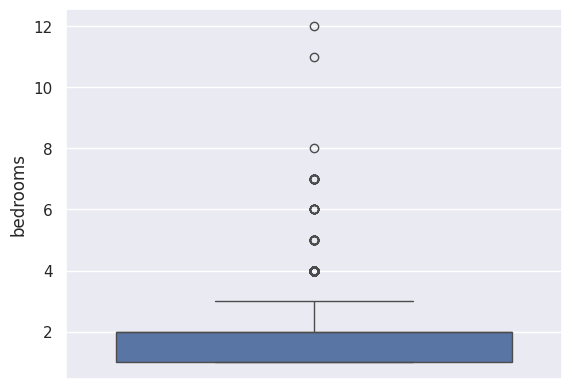

In [24]:
sns.boxplot(data=df_test["bedrooms"])

In [27]:
df_train[df_train["bedrooms"] < 0][['bedrooms']]

,bedrooms
id,
6584,-2.0
8571,-3.0
66523,-3.0
75091,-1.0
350254,-2.0
432319,-2.0
471865,-13.0
477036,-1.0
491767,-2.0


In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 985180 entries, 556713 to 1000000
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ad_type          985180 non-null  object 
 1   start_date       985180 non-null  object 
 2   end_date         985180 non-null  object 
 3   created_on       985180 non-null  object 
 4   lat              832453 non-null  float64
 5   lon              833388 non-null  float64
 6   l1               985180 non-null  object 
 7   l2               985180 non-null  object 
 8   l3               927733 non-null  object 
 9   l4               225006 non-null  object 
 10  l5               4711 non-null    object 
 11  l6               0 non-null       float64
 12  rooms            496527 non-null  float64
 13  bedrooms         386021 non-null  float64
 14  bathrooms        766218 non-null  float64
 15  surface_total    441184 non-null  float64
 16  surface_covered  430023 non-null  flo

In [30]:
df_train.describe()

,lat,lon,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,832453.000000,833388.000000,0.0,496527.000000,386021.000000,766218.000000,441184.000000,4.300230e+05,9.407990e+05
mean,-59.273078,-34.795283,NaN,2.865331,2.088822,1.700136,500.110607,5.851866e+02,2.888822e+05
std,2.716961,3.078145,NaN,1.687075,2.719330,1.074748,4133.349588,7.443324e+04,5.581522e+06
min,-180.000000,-54.842464,NaN,1.000000,-13.000000,1.000000,-200.000000,-1.700000e+02,0.000000e+00
25%,-58.762921,-34.923353,NaN,2.000000,1.000000,1.000000,50.000000,4.500000e+01,3.900000e+04
50%,-58.444935,-34.611182,NaN,3.000000,2.000000,1.000000,96.000000,7.500000e+01,9.725400e+04
75%,-58.047423,-34.454720,NaN,4.000000,3.000000,2.000000,275.000000,1.580000e+02,2.100000e+05
max,-35.045025,85.051129,NaN,40.000000,900.000000,20.000000,200000.000000,2.700000e+07,3.100000e+09


*0.1.7. Atributo "surface_total" & "surface_covered:"*

---------

In [32]:
print("surface_total:")
print(f"cantidad de datos no nulos para df_train : {df_train['surface_total'].count()} --> {df_train['surface_total'].count()/df_train['surface_total'].shape[0]*100:.2f} %")
print(f"cantidad de datos no nulos para df_test : {df_test['surface_total'].count()}--> {df_test['surface_total'].count()/df_test['surface_total'].shape[0]*100:.2f} %")
print('')
print("surface_covered:")
print(f"cantidad de datos no nulos para df_train : {df_train['surface_covered'].count()} --> {df_train['surface_covered'].count()/df_train['surface_covered'].shape[0]*100:.2f} %")
print(f"cantidad de datos no nulos para df_test : {df_test['surface_covered'].count()}--> {df_test['surface_covered'].count()/df_test['surface_covered'].shape[0]*100:.2f} %")



surface_total:
cantidad de datos no nulos para df_train : 441184 --> 44.78 %
cantidad de datos no nulos para df_test : 6980--> 99.54 %

surface_covered:
cantidad de datos no nulos para df_train : 430023 --> 43.65 %
cantidad de datos no nulos para df_test : 6938--> 98.94 %


In [37]:
df_train.describe()[["surface_total","surface_covered"]]

,surface_total,surface_covered
count,441184.000000,4.300230e+05
mean,500.110607,5.851866e+02
std,4133.349588,7.443324e+04
min,-200.000000,-1.700000e+02
25%,50.000000,4.500000e+01
50%,96.000000,7.500000e+01
75%,275.000000,1.580000e+02
max,200000.000000,2.700000e+07


In [44]:
df_test.describe()[["surface_total" , "surface_covered"]]

,surface_total,surface_covered
count,6980.000000,6938.000000
mean,76.393553,66.649178
std,75.227804,61.792004
min,10.000000,1.000000
25%,40.000000,37.000000
50%,56.000000,50.000000
75%,84.000000,75.000000
max,1515.000000,2422.000000


In [42]:
print(f"Cantidad de valores < 0 de 'surface_total': {df_train[df_train['surface_total'] < 0][['surface_total']].count()}")
print(f"Cantidad de valores < 0 de 'surface_covered': {df_train[df_train['surface_covered'] < 0][['surface_covered']].count()}")



Cantidad de valores < 0 de 'surface_total': surface_total    6
dtype: int64
Cantidad de valores < 0 de 'surface_covered': surface_covered    11
dtype: int64


In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 985180 entries, 556713 to 1000000
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ad_type          985180 non-null  object 
 1   start_date       985180 non-null  object 
 2   end_date         985180 non-null  object 
 3   created_on       985180 non-null  object 
 4   lat              832453 non-null  float64
 5   lon              833388 non-null  float64
 6   l1               985180 non-null  object 
 7   l2               985180 non-null  object 
 8   l3               927733 non-null  object 
 9   l4               225006 non-null  object 
 10  l5               4711 non-null    object 
 11  l6               0 non-null       float64
 12  rooms            496527 non-null  float64
 13  bedrooms         386021 non-null  float64
 14  bathrooms        766218 non-null  float64
 15  surface_total    441184 non-null  float64
 16  surface_covered  430023 non-null  flo

*0.1.8. currency":*

---------

In [55]:
print(f"cantidad de datos no nulos para df_train : {df_train['currency'].count()} --> {df_train['currency'].count()/df_train['currency'].shape[0]*100:.2f} %")
print(f"cantidad de datos no nulos para df_test : {df_test['currency'].count()}--> {df_test['currency'].count()/df_test['currency'].shape[0]*100:.2f} %")

cantidad de datos no nulos para df_train : 937929 --> 95.20 %
cantidad de datos no nulos para df_test : 7012--> 100.00 %


In [54]:
print(f"valores para df_train : {df_train['currency'].unique()}")
print(f"valores para df_test : {df_test['currency'].unique()}")

valores para df_train : ['USD' 'ARS' nan 'UYU' 'PEN']
valores para df_test : ['USD' 'ARS']


In [58]:
df_train[df_train['l1']=='Argentina']['currency'].unique()

array(['USD', 'ARS', nan, 'PEN'], dtype=object)

In [59]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 985180 entries, 556713 to 1000000
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ad_type          985180 non-null  object 
 1   start_date       985180 non-null  object 
 2   end_date         985180 non-null  object 
 3   created_on       985180 non-null  object 
 4   lat              832453 non-null  float64
 5   lon              833388 non-null  float64
 6   l1               985180 non-null  object 
 7   l2               985180 non-null  object 
 8   l3               927733 non-null  object 
 9   l4               225006 non-null  object 
 10  l5               4711 non-null    object 
 11  l6               0 non-null       float64
 12  rooms            496527 non-null  float64
 13  bedrooms         386021 non-null  float64
 14  bathrooms        766218 non-null  float64
 15  surface_total    441184 non-null  float64
 16  surface_covered  430023 non-null  flo

*0.1.9. title:*

---------

In [60]:
df_train['title'].unique()

array(['Departamento en Venta en Belgrano, Capital federal ',
       'PH Venta Boedo 2 amb Patio',
       'Venta 3 Ambientes - Almagro - Balcón - Amenities -', ...,
       'GRAN CASA EN IMPORTANTE LOTE Y EXCELENTE UBICACIÓN !',
       'Venta en Bloque', 'PALMARES SEGUNDA ETAPA'], dtype=object)

In [61]:
df_test['title'].unique()

array(['Casa de 4 ambientes en Venta en Palermo viejo',
       'Casa de 8 ambientes en Venta en Palermo',
       'Venta de casa en PH en Floresta', ...,
       'VENTA DEPARTAMENTO 3 AMB VIRREY OLAGUER FELIU AL 3400',
       'EXCELENTE 3 AMB CON COCHERA Y BAULERA EN VILLA URQUIZA',
       'EXCELENTE 3 AMB CON 2 COCHERAS Y BAULERA EN VILLA URQUIZA'],
      dtype=object)

*0.1.10. description:*

---------

In [62]:
df_train['description'].unique()

array(['Sup total por escritura: 96,47 m2 (cubiertos: 61 m2 y descubiertos: 35,79 m2).&nbsp; Actualmente cuenta en el 9no piso con un cerramiento de 14 m2 aprox ganados sobre los metros descubiertos del balcón.  Hermoso 4 ambientes tipo Duplex   a 2 cuadras de Avda Cabildo,   con variedad de medios de transporte  (Metrobus- subte línea D).   VENTA DIRECTA, el propietario no necesita otra propiedad.   (el ascensor llega hasta el 7° piso, el acceso a la propiedad es de un piso por escalera)  Semipiso súper luminoso desarrollado en 2 plantas:  8vo piso:  Living comedor con pisos flotantes.   Balcón terraza con excelente vista abierta.  Amplia cocina office.  Baulera en bajo escalera.   9no piso:  Dormitorio principal en suite.   2do dormitorio con acceso a balcón con cerramiento parcial.   Toilette.  Baulera.  Le interesa comprar esta propiedad y no vendió la suya? Llámenos al 4777-5000 y lo ayudaremos  Más info y video clickee aquí   http://www.cabildo500.com/propiedades.php?idpropiedad0

*0.1.11. property_type:*

---------

In [67]:
print(f"Cantidad de datos non nan df_train: {df_train['property_type'].count()}")
print(f"Cantidad de datos non nan df_test: {df_test['property_type'].count()}")

Cantidad de datos non nan df_train: 985180
Cantidad de datos non nan df_test: 7012


In [65]:
print(f"tipos en df_train : {df_train['property_type'].unique()}")
print(f"tipos en df_test : {df_test['property_type'].unique()}")

tipos en df_train : ['Departamento' 'PH' 'Cochera' 'Casa' 'Lote' 'Otro' 'Oficina' 'Depósito'
 'Local comercial' 'Casa de campo']
tipos en df_test : ['Casa' 'Cochera' 'Departamento']


<Axes: >

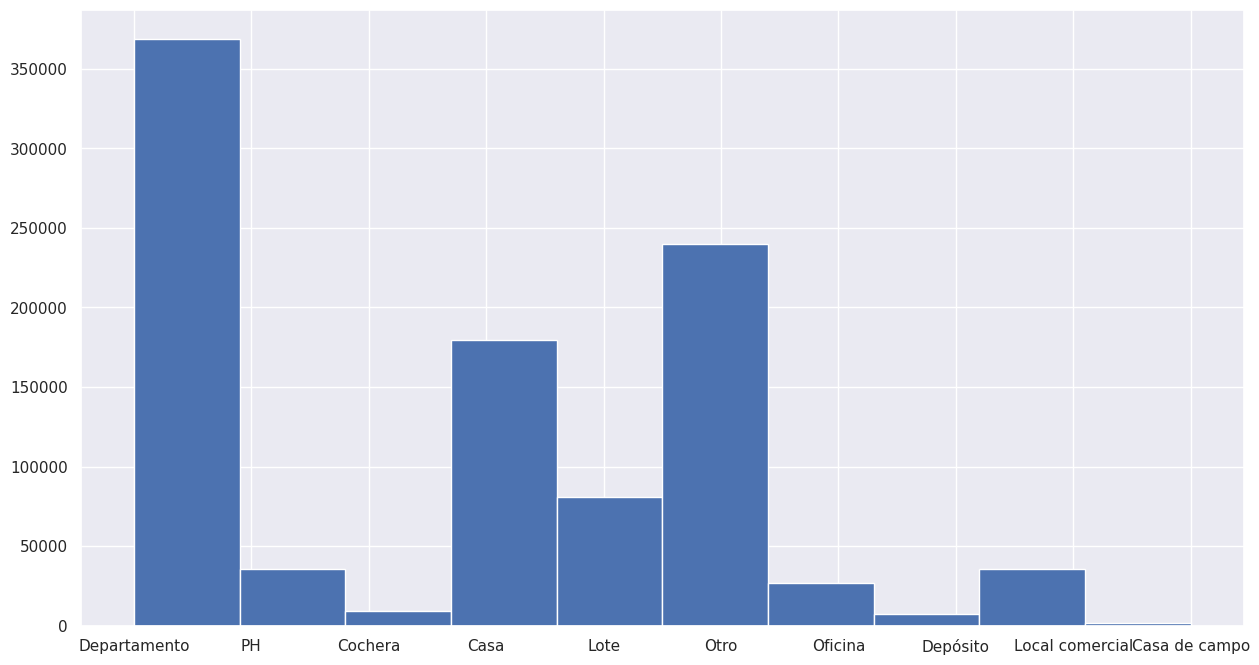

In [71]:
df_train['property_type'].hist(figsize=(15,8))

<Axes: >

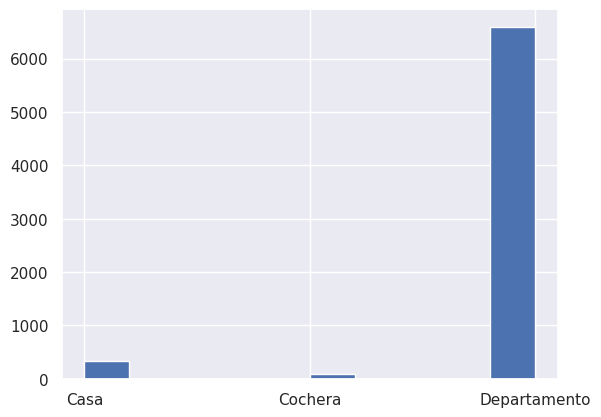

In [72]:
df_test['property_type'].hist()

*0.1.12. operation_type:*

---------

In [74]:
print(f"Cantidad de datos non nan df_train: {df_train['operation_type'].count()}")
print(f"Cantidad de datos non nan df_test: {df_test['operation_type'].count()}")

Cantidad de datos non nan df_train: 985180
Cantidad de datos non nan df_test: 7012


In [75]:
print(f"tipos en df_train : {df_train['operation_type'].unique()}")
print(f"tipos en df_test : {df_test['operation_type'].unique()}")

tipos en df_train : ['Venta' 'Alquiler' 'Alquiler temporal']
tipos en df_test : ['Venta']


<Axes: >

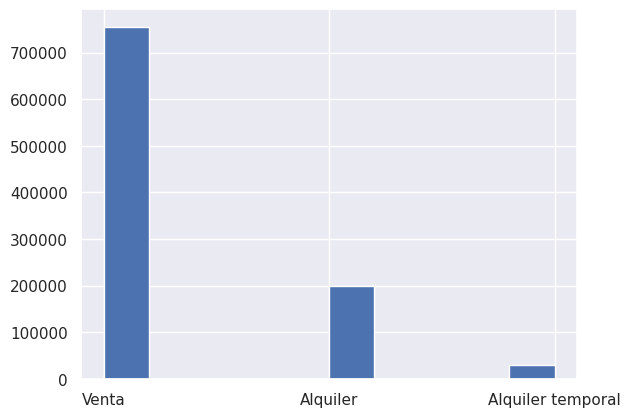

In [77]:
df_train['operation_type'].hist()

In [86]:
operation_types = df_train["operation_type"].unique()
cantidad=0
for o in operation_types :
  cantidad = df_train[df_train['operation_type'] == o]['operation_type'].count()
  proporcion = cantidad / df_train['operation_type'].count()
  print(f"cantidad de {o} : {cantidad} --> {proporcion *100:.2f} % ")

cantidad de Venta : 755306 --> 76.67 % 
cantidad de Alquiler : 199399 --> 20.24 % 
cantidad de Alquiler temporal : 30475 --> 3.09 % 


<Axes: >

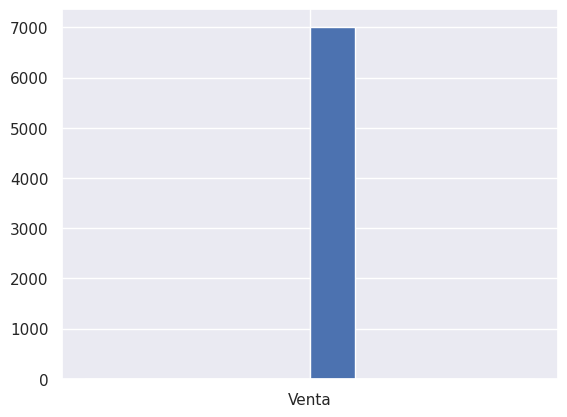

In [78]:
df_test['operation_type'].hist()

## 1. Entender los datos (AID)

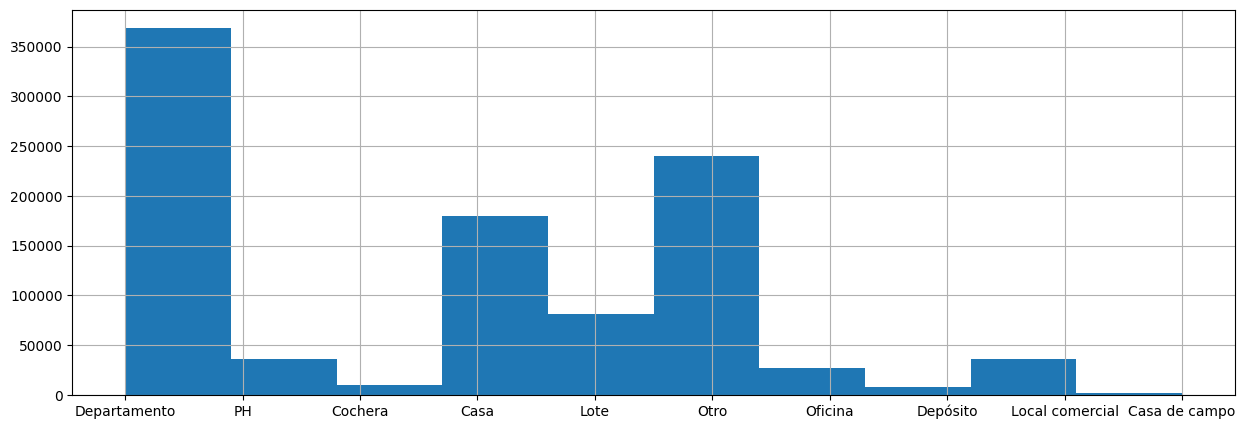

In [ ]:
df_train["property_type"].hist(figsize=(15,5));

## 2. Limpiar y transformar los datos (MD)

In [103]:
# Selección de datos. Solo a fines demostrativos.
# TODO: cambiar!
df_ent = df_train.loc[(df_train["l2"] == "Capital Federal") & (df_train["operation_type"] == 'Venta') & (df_train["property_type"] == "Departamento")].copy()
df_ap=df_test.copy()

In [104]:
df_ent.shape

(98781, 24)

In [105]:
df_ent.columns

Index(['ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1',
       'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'currency', 'price_period', 'title',
       'description', 'property_type', 'operation_type', 'price'],
      dtype='object')

In [106]:
df_ent.drop(columns=["l5","l6"], inplace=True)

In [107]:
df_ent.columns

Index(['ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1',
       'l2', 'l3', 'l4', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'currency', 'price_period', 'title', 'description',
       'property_type', 'operation_type', 'price'],
      dtype='object')

sktlearn necesita que los datos no tengan valores perdidos, y todo tiene que ser un numero. No le podes pasar el nombre de los barrios.

Aca abajo estamos rellenando los valores perdidos y les ponemos valores 0

In [108]:
# La creación de modelos requiere que no haya valores perdidos
# Llenamos todo con 0 a lo bestia
# TODO: mejorar la imputación de valores perdidos
df_ent.fillna(0, inplace=True)

## 3. Entrenamiento del modelos (AA)

In [109]:
# La creación de modelos requiere que todo el dataframe sea numérico
# Me quedo con las columnas numéricas solamente
# TODO: traducir las columnas con datos no numéricos a numéricos para que mejoren los modelos
df_ent = df_ent.select_dtypes('number')

X = df_ent[df_ent.columns.drop('price')]
y = df_ent['price']

In [110]:
X.shape

(98781, 7)

In [111]:
df_ent.shape

(98781, 8)

In [112]:
df_ent.columns

Index(['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price'],
      dtype='object')

In [116]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

# Definimos el valor de los hiperparámetros a usar por el modelo
# TODO: hacer pruebas cambiando los valores de los hiperparámetros para mejorar el score
n_estimators = 50
max_depth = 5

### NO CAMBIAR RandomForestRegressor por otro modelo
### NOTA: Si en la primera entrega usan otro modelo, su nota será 0
### Pueden cambiar los hiperparámetros que afectan al árbol: n_estimators, criterion, max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_features, max_leaf_nodes, min_impurity_decrease
reg = sk.ensemble.RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, n_jobs=-1, random_state=42)

# Entrenamos el modelo
_ = reg.fit(X_train, y_train)

# Cálculo del error en entrenamiento (train)
y_pred = reg.predict(X_train)
# Aca estoy haciendo las predicciones en el train para ver si el modelo no memorizo de los datos.
score_train = sk.metrics.root_mean_squared_error(y_train, y_pred)

# Cálculo del error en prueba (test)
y_pred = reg.predict(X_test)
score_test  = sk.metrics.root_mean_squared_error(y_test,  y_pred)

print(f"{n_estimators=} -- {max_depth=} --> {score_train=:.2f} - {score_test=:.2f}")


n_estimators=50 -- max_depth=5 --> score_train=862455.43 - score_test=926764.92


Una vez que validamos el score test, tenemos que volver a entrenar el modelo con el 100% de los datos.


## 4. Solución para subir Kaggle

In [113]:
df_ap.drop(columns=["l5","l6"], inplace=True)

In [115]:
df_ap.columns

Index(['ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1',
       'l2', 'l3', 'l4', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'currency', 'price_period', 'title', 'description',
       'property_type', 'operation_type', 'price'],
      dtype='object')

In [117]:
X = df_ent[df_ent.columns.drop('price')]
y = df_ent['price']

# Entrenamos el modelo con todos los datos de entrenamiento.csv
reg.fit(X, y)

RandomForestRegressor(max_depth=5, n_estimators=50, n_jobs=-1, random_state=42)

In [118]:
# Hacemos en df_ap la misma limpieza que en df_ent
df_ap = df_ap.fillna(0)

df_ap = df_ap.select_dtypes('number')

X_ap = df_ap[X.columns]
# y_ap = df_ap['price'] # no es necesario!

# Predecimos los precios del dataset a predecir
y_pred_ap = reg.predict(X_ap)
y_pred_ap

array([1060857.06098746,  973876.68318884,  459435.52280794, ...,
        944725.06959593,  352693.56654858,  240166.85440228])

In [119]:
# Lleno el precio de df_ap con las predicciones
df_ap["price"] = y_pred_ap

# Grabo el df_ap en un archivo csv para subir a Kaggle
df_ap["price"].to_csv("solucion.csv")